## The following workbook is a walkthrough for using multiple linear regression in statsmodels & sklearn.
## For the first several examples, no data is held back for a test data set, while this is generally unadvisable & poor practice; the  regression coefficients are already extremely low in these examples even on the training data & would be worse on a test set. 

## Some common pitfalls and data cleaning techniques are demonstrated by example

### The dataset is a real world example from reservoir engineering with data identity removed

In [312]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from sklearn import metrics
#MID ADD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
# For reproducibility
np.random.seed(1000)

nb_samples = 1000

#path='C:\\Users\\Mark\\Documents\\CS - Code\\GitHub-20190615T150318Z-001\\'
path='C:\\users\\thede\\Documents\\CS-code\\github\\'
file='final wb.csv'

## Alt way to load CSV file (csv library; not pandas)

In [153]:
with open(path+file,'rt')as f:
#with open('C:\\users\\thede\\Documents\\CS-code\\github\\final wb.csv','rt')as f:
    datas = csv.reader(f)
    #reader = csv.DictReader(open("C:\\users\\thede\\Documents\\CS-code\\github\\final wb.csv"))
    #for row in reader:
    #    print(row)
    for row in datas:
        print(row)   

['ID', 'xloc', 'yloc', 'Mobility', 'BV', 'lbs-ft', 'EUR-ft']
['-7', '-873', '14736', '', '', '389', '48']
['-7', '-873', '14736', '', '', '504', '']
['0', '3364', '5641', '', '51044.73', '251', '59']
['1', '3453', '7876', '20', '51051.7', '317', '56']
['2', '31136', '8032', '8', '53792.48', '498', '76']
['3', '31136', '8032', '9', '26786.69', '497', '13']
['8', '11547', '6965', '', '110607.69', '470', '63']
['12', '31441', '3878', '3', '', '465', '26']
['15', '12258', '19567', '10', '84953.69', '392', '39']
['18', '122', '29865', '14', '', '490', '75']
['19', '-72', '28303', '11', '116035.34', '502', '50']
['20', '-2639', '28712', '10', '126925.16', '443', '55']
['21', '-3772', '27982', '15', '', '257', '43']
['22', '-4596', '27235', '6', '', '38', '42']
['23', '', '', '4', '', '', '43']
['24', '6945', '13500', '11', '', '459', '59']
['25', '2056', '13316', '8', '96053.42', '452', '48']
['26', '6028', '10001', '14', '80329.11', '521', '69']
['27', '12459', '24798', '11', '82306.64', '5

## Easiest way to load CSV (Pandas)

In [319]:
#Import CSV into a new pandas dataframe called result
result = pd.read_csv(path+file)

print(result[:64])

#Note zeros in some locations should be set to null
result.iloc[21,4]=float('NaN')
result.iloc[22,4]=float('NaN')
print(result.iloc[21,4])
print(result.iloc[22,4])



       ID     xloc     yloc  Mobility         BV  lbs-ft  EUR-ft
0    -7.0   -873.0  14736.0       NaN        NaN   389.0    48.0
1    -7.0   -873.0  14736.0       NaN        NaN   504.0     NaN
2     0.0   3364.0   5641.0       NaN   51044.73   251.0    59.0
3     1.0   3453.0   7876.0      20.0   51051.70   317.0    56.0
4     2.0  31136.0   8032.0       8.0   53792.48   498.0    76.0
5     3.0  31136.0   8032.0       9.0   26786.69   497.0    13.0
6     8.0  11547.0   6965.0       NaN  110607.69   470.0    63.0
7    12.0  31441.0   3878.0       3.0        NaN   465.0    26.0
8    15.0  12258.0  19567.0      10.0   84953.69   392.0    39.0
9    18.0    122.0  29865.0      14.0        NaN   490.0    75.0
10   19.0    -72.0  28303.0      11.0  116035.34   502.0    50.0
11   20.0  -2639.0  28712.0      10.0  126925.16   443.0    55.0
12   21.0  -3772.0  27982.0      15.0        NaN   257.0    43.0
13   22.0  -4596.0  27235.0       6.0        NaN    38.0    42.0
14   23.0      NaN      N

## 4 parameter linear regression
## no intercept by default (note artificially high r^2)
This is because no intercept is used. This will be corrected in the next example.

In [314]:

#df = pd.DataFrame(data.data, columns=data.feature_names)
target = result["EUR-ft"][:64]
y = target
#print(target)
X = result[["xloc","yloc","BV","lbs-ft"]][:64]
#X = result["yloc"][:64]
print(X)



       xloc     yloc         BV  lbs-ft
0    -873.0  14736.0        NaN   389.0
1    -873.0  14736.0        NaN   504.0
2    3364.0   5641.0   51044.73   251.0
3    3453.0   7876.0   51051.70   317.0
4   31136.0   8032.0   53792.48   498.0
5   31136.0   8032.0   26786.69   497.0
6   11547.0   6965.0  110607.69   470.0
7   31441.0   3878.0        NaN   465.0
8   12258.0  19567.0   84953.69   392.0
9     122.0  29865.0        NaN   490.0
10    -72.0  28303.0  116035.34   502.0
11  -2639.0  28712.0  126925.16   443.0
12  -3772.0  27982.0        NaN   257.0
13  -4596.0  27235.0        NaN    38.0
14      NaN      NaN        NaN     NaN
15   6945.0  13500.0        NaN   459.0
16   2056.0  13316.0   96053.42   452.0
17   6028.0  10001.0   80329.11   521.0
18  12459.0  24798.0   82306.64   542.0
19  12088.0  23338.0   75186.40   468.0
20  12571.0  20806.0   66067.94   487.0
21   2381.0  30788.0        NaN   360.0
22   1340.0  30253.0        NaN   485.0
23  12181.0  17941.0  129642.27   474.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EUR-ft   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     34.00
Date:                Mon, 17 Jun 2019   Prob (F-statistic):           2.39e-09
Time:                        19:15:31   Log-Likelihood:                -125.02
No. Observations:                  27   AIC:                             258.0
Df Residuals:                      23   BIC:                             263.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
xloc          -0.0005      0.001     -0.733      0.471      -0.002       0.001
yloc          -0.0021      0.001     -2.597      0.016      -0.004      -0.000
BV           4.44e-05      0.000      0.304      0.764      -0.000       0.000
lbs-ft         0.1918      0.034      5.585      0.000       0.121       0.263
==============================================================================
Omnibus:                        0.884   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.643   Jarque-Bera (JB):                0.473
Skew:                           0.324   Prob(JB):                        0.789
Kurtosis:                       2.964   Cond. No.                         656.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

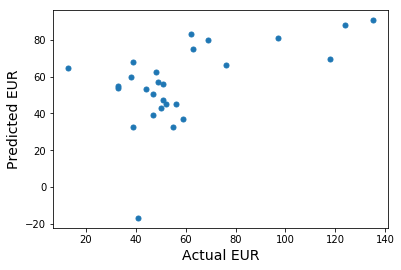

In [317]:
model = sm.OLS(y, X,missing='drop').fit()
predictions = model.predict(X) # make the predictions by the model
plt.plot(y,predictions, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual EUR",fontsize=14)
plt.ylabel("Predicted EUR",fontsize=14)
# Print out the statistics
model.summary()

## 4 parameter linear regression with intercept
## Caution with using statsmodels: last model r^2 was overinflated, even on the own training set....
This is because no intercept is used. When adding in intercept (one cell down), R^2 matches that of R (two cells down) very well.

FYI.  sklearn (used later) has no regression summary (reasons why answered in post below) 
https://stackoverflow.com/questions/26319259/sci-kit-and-regression-summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EUR-ft   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     5.055
Date:                Mon, 17 Jun 2019   Prob (F-statistic):            0.00482
Time:                        19:16:32   Log-Likelihood:                -119.62
No. Observations:                  27   AIC:                             249.2
Df Residuals:                      22   BIC:                             255.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.4881     24.179      3.288      0.003      29.344     129.632
xloc          -0.0008      0.001     -1.388      0.179      -0.002       0.000
yloc          -0.0019      0.001     -2.864      0.009      -0.003      -0.001
BV            -0.0002      0.000     -1.233      0.231      -0.000       0.000
lbs-ft         0.0636      0.048      1.313      0.203      -0.037       0.164
==============================================================================
Omnibus:                        2.714   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                1.435
Skew:                           0.009   Prob(JB):                        0.488
Kurtosis:                       4.129   Cond. No.                     5.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

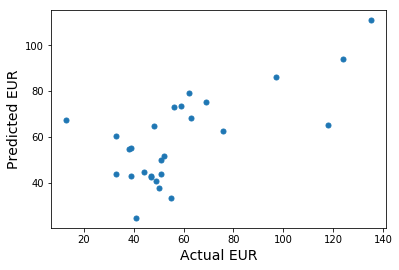

In [318]:
X_c=X.copy()
X_c=sm.add_constant(X_c)
#display(X_c)
model_c = sm.OLS(y, X_c,missing='drop').fit()
#predictions_c = model.predict(X_c) # make the predictions by the model
#plt.plot(y,predictions_c, linestyle='None',marker='.',markersize=10)
#plt.xlabel("Actual EUR",fontsize=14)
#plt.ylabel("Predicted EUR",fontsize=14)
# Print out the statistics
predictions_c = model_c.predict(X_c) # make the predictions by the model
plt.plot(y,predictions_c, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual EUR",fontsize=14)
plt.ylabel("Predicted EUR",fontsize=14)
model_c.summary()


## Excerpt from R program, showing similar r^2 as the "with intercept" example above 
lin_mod1b<-lm(EUR.ft~BV+lbs.ft+xloc+yloc,data=wb_trun)

summary(lin_mod1b)


lm(formula = EUR.ft ~ BV + lbs.ft + xloc + yloc, data = wb_trun)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.572 -14.038  -1.008  11.131  54.883 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.664e+01  2.213e+01   3.915 0.000654 ***

BV          -2.681e-04  9.366e-05  -2.862 0.008591 ** 
lbs.ft       5.947e-02  4.620e-02   1.287 0.210251    
xloc        -9.149e-04  5.234e-04  -1.748 0.093242 .  
yloc        -1.489e-03  4.912e-04  -3.031 0.005769 **
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.01 on 24 degrees of freedom
  (35 observations deleted due to missingness)
  
**Multiple R-squared:  0.4683,	Adjusted R-squared:  0.3797 **

F-statistic: 5.285 on 4 and 24 DF,  p-value: 0.003377



## The following exersize shows how to remove the nulls from the dataframe 
### (this is not necessary in statsmodels, but is necessary for sklearn example later)

..




In [282]:

X_noN=X.copy()
y_noN=y.copy()
for i in range(0,X["BV"].size):
    #print(i,"=",X3b.iloc[i,1])
    for j in range(0,3):
        if math.isnan(X.iloc[i,j]):
            #print("not a number at i,j",i,j,", <do some removal>....")
            #X_noNaN.iloc[i,j]=float('NaN')
            ;
#print("-9999  values with missing BV, to keep same observation set as 2c")
X_noN["EUR-ft"]=y
X_noN=X_noN.dropna(how='any',axis=0)
y_noN=X_noN["EUR-ft"]
del(X_noN["EUR-ft"])
#display(X_noN)
#display(y_noN)

X_noN=sm.add_constant(X_noN)
model_noN = sm.OLS(y_noN, X_noN).fit()
model_noN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EUR-ft   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     5.055
Date:                Mon, 17 Jun 2019   Prob (F-statistic):            0.00482
Time:                        11:53:39   Log-Likelihood:                -119.62
No. Observations:                  27   AIC:                             249.2
Df Residuals:                      22   BIC:                             255.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.4881     24.179      3.288      0.003      29.344     129.632
xloc          -0.0008      0.001     -1.388      0.179      -0.002       0.000
yloc          -0.0019      0.001     -2.864      0.009      -0.003      -0.001
BV            -0.0002      0.000     -1.233      0.231      -0.000       0.000
lbs-ft         0.0636      0.048      1.313      0.203      -0.037       0.164
==============================================================================
Omnibus:                        2.714   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                1.435
Skew:                           0.009   Prob(JB):                        0.488
Kurtosis:                       4.129   Cond. No.                     5.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Predicted EUR')

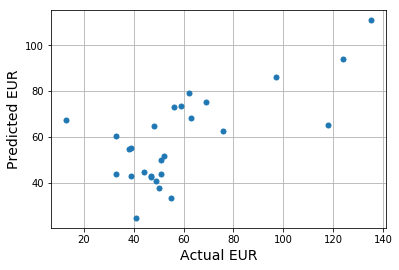

In [291]:
predictions_noN = model_noN.predict(X_noN) # make the predictions by the model
plt.plot(y_noN,predictions_noN, linestyle='None',marker='.',markersize=10)
plt.grid()
plt.xlabel("Actual EUR",fontsize=14)
plt.ylabel("Predicted EUR",fontsize=14)

## 4 parameter linear regression: sklearn. Note removing nulls is required in this case 

No explicit intecept


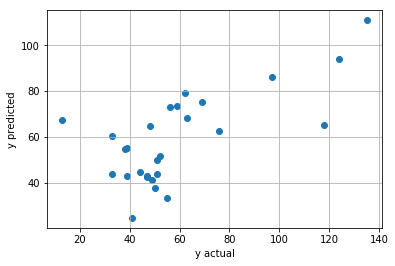

In [290]:
lr1=LinearRegression()
lr1.fit(X_noN,y_noN)
predictions_noN_LR=lr1.predict(X_noN)

#display(predictions_noN_LR)
#display(y_noN.values)
plt.xlabel('y actual')
plt.ylabel('y predicted')
plt.grid()
plt.scatter(y_noN.values,predictions_noN_LR)
plt.show()

#Need to show r^2 here for comparison.....results look the same
#metrics.classification_report(y_noN.values,predictions_noN_LR)


In [289]:

c1=np.c_[X_c,y,predictions_c]
#c2=np.c_[X_test2,Y_test2]
#display(c)
d1={'yloc':c1[:,2],'BV':c1[:,3],'lbs-ft':c1[:,4],'EUR-ft(Actual)':c1[:,5],'EUR-ft(Pred.)':c1[:,6]}
#d2={'Xtest0':c2[:,0],'Xtest1':c2[:,1],'Ytest':c2[:,2]}
#,'Xtest':X_test2,'Ytrain':Y_train2,'Ytest':Y_test2}
XYactualAndPred=pd.DataFrame(data=d1)
#XYtest2=pd.DataFrame(data=d2)

print("4 predictors, linear")
display(XYactualAndPred)#[:15])

4 predictors, linear


,yloc,BV,lbs-ft,EUR-ft(Actual),EUR-ft(Pred.)
0,14736.0,NaN,389.0,48.0,NaN
1,14736.0,NaN,504.0,NaN,NaN
2,5641.0,51044.73,251.0,59.0,73.352476
3,7876.0,51051.70,317.0,56.0,73.208900
4,8032.0,53792.48,498.0,76.0,62.612841
5,8032.0,26786.69,497.0,13.0,67.165796
6,6965.0,110607.69,470.0,63.0,68.261480
7,3878.0,NaN,465.0,26.0,NaN
8,19567.0,84953.69,392.0,39.0,43.049097
9,29865.0,NaN,490.0,75.0,NaN



## 3 parameter linear regression (drop xloc) . Best model; Result almost as strong r^2 as 4 param model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EUR-ft   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     5.862
Date:                Mon, 17 Jun 2019   Prob (F-statistic):            0.00398
Time:                        19:01:39   Log-Likelihood:                -120.75
No. Observations:                  27   AIC:                             249.5
Df Residuals:                      23   BIC:                             254.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.1534     24.347      3.046      0.006      23.788     124.518
yloc          -0.0019      0.001     -2.730      0.012      -0.003      -0.000
BV            -0.0001      0.000     -0.899      0.378      -0.000       0.000
lbs-ft         0.0452      0.048      0.952      0.351      -0.053       0.144
==============================================================================
Omnibus:                        5.899   Durbin-Watson:                   1.496
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                4.639
Skew:                          -0.543   Prob(JB):                       0.0983
Kurtosis:                       4.716   Cond. No.                     5.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

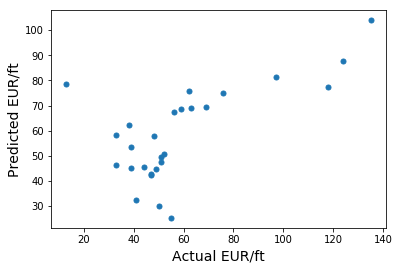

In [307]:
X2 = result[["yloc","BV","lbs-ft"]][:64]
#X2 will be a new pandas dataframe (not a reference)
X2=sm.add_constant(X2)
model2 = sm.OLS(y, X2,missing='drop').fit()

predictions2 = model2.predict(X2) # make the predictions by the model
plt.plot(y,predictions2, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual EUR/ft",fontsize=14)
plt.ylabel("Predicted EUR/ft",fontsize=14)

#print("Actual, predictions")
#print(np.c_[y,predictions2])
# Print out the statistics
model2.summary()

In [293]:
#Exclude row=26, ID=39 from previous plot, visible outlier
#X2.iloc[26,0]=float('NaN')
#X2.iloc[26,1]=float('NaN')
#X2.iloc[26,2]=float('NaN')
#print("X2, row 26 after setting nulls\n",X2.iloc[26,:],"\n")

#print("result dataframe row 26, after the above process \n",result.iloc[26,:],"\n")
#this verifies that X2 was a copy of result, and not a reference to the original result data frame
#model2_ol = sm.OLS(y, X2,missing='drop').fit()
#predictions2_ol = model2_ol.predict(X2) # make the predictions by the model
#plt.plot(y,predictions2_ol, linestyle='None',marker='.',markersize=10)
#plt.xlabel("Actual EUR",fontsize=14)
#plt.ylabel("Predicted EUR",fontsize=14)
# Print out the statistics

#model2_ol.summary()

In [306]:
c1=np.c_[X2,y,predictions2_ol]

d1={'yloc':c1[:,1],'BV':c1[:,2],'lbs-ft':c1[:,3],'EUR-ft(Actual)':c1[:,4],'EUR-ft(Pred.)':c1[:,5]}

XYactualAndPred=pd.DataFrame(data=d1)


print("3 predictors, linear & outlier (ID=39) removed")
display(XYactualAndPred[:20])
display(XYactualAndPred[20:40])
display(XYactualAndPred[40:64])

3 predictors, linear & outlier (ID=39) removed


,yloc,BV,lbs-ft,EUR-ft(Actual),EUR-ft(Pred.)
0,14736.0,NaN,389.0,48.0,NaN
1,14736.0,NaN,504.0,NaN,NaN
2,5641.0,51044.73,251.0,59.0,62.458702
3,7876.0,51051.70,317.0,56.0,63.289770
4,8032.0,53792.48,498.0,76.0,76.601727
5,8032.0,26786.69,497.0,13.0,79.988900
6,6965.0,110607.69,470.0,63.0,69.186919
7,3878.0,NaN,465.0,26.0,NaN
8,19567.0,84953.69,392.0,39.0,42.448885
9,29865.0,NaN,490.0,75.0,NaN


,yloc,BV,lbs-ft,EUR-ft(Actual),EUR-ft(Pred.)
20,20806.0,66067.94,487.0,51.0,49.838169
21,30788.0,NaN,360.0,67.0,NaN
22,30253.0,NaN,485.0,80.0,NaN
23,17941.0,129642.27,474.0,33.0,46.139299
24,15964.0,146486.24,462.0,51.0,46.820081
25,15546.0,171813.41,453.0,49.0,43.673412
26,NaN,NaN,78.0,41.0,NaN
27,16528.0,146511.37,441.0,44.0,44.122414
28,14707.0,128947.50,501.0,39.0,54.473249
29,14346.0,114643.54,379.0,52.0,47.585995


,yloc,BV,lbs-ft,EUR-ft(Actual),EUR-ft(Pred.)
40,2442.0,NaN,349.0,78.0,NaN
41,4791.0,NaN,349.0,97.0,NaN
42,-11452.0,NaN,43.0,37.0,NaN
43,15289.0,58320.83,524.0,38.0,64.198286
44,15437.0,NaN,52.0,64.0,NaN
45,11335.0,NaN,376.0,107.0,NaN
46,9412.0,NaN,317.0,84.0,NaN
47,10571.0,NaN,491.0,40.0,NaN
48,10579.0,NaN,515.0,27.0,NaN
49,10952.0,NaN,250.0,111.0,NaN


## Interpreting meaning of coefficients 



In [159]:
# interpreting coefficients:
# meaning of lbs-ft coefficient.
# For every 100 increase in lbs-ft, EUR/ft expected increase by
# 0.1991*100=19.9
# For every 1000' in coordinate southward, EUR/ft decrease by 
# 0.0021*1000=2.1
print("Average lbs/ft",np.mean(X2["lbs-ft"]))
print("Average result (EUR)",np.mean(y))
print("for every ",(100/np.mean(X2["lbs-ft"])),"relative to the mean increase in lbs/ft,",(19.9/np.mean(y))," relative to the mean increase in result")
print("for every 1000 ft increase in southern distance/location, ",1000*0.0021," decrease in result ")

Average lbs/ft 404.7090909090909
Average result (EUR) 59.967213114754095
for every  0.24709106428860236 relative to the mean increase in lbs/ft, 0.3318480043739748  relative to the mean increase in result
for every 1000 ft increase in southern distance/location,  2.1  decrease in result 


## 3 parameter log-linear  regression - weaker correlation



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EUR-ft   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     2.047
Date:                Mon, 17 Jun 2019   Prob (F-statistic):              0.137
Time:                        15:01:11   Log-Likelihood:                -13.913
No. Observations:                  26   AIC:                             35.83
Df Residuals:                      22   BIC:                             40.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0709      0.660      6.169      0.000       2.702       5.439
yloc       -2.595e-05   1.34e-05     -1.936      0.066   -5.37e-05    1.84e-06
BV         -4.372e-07   2.69e-06     -0.163      0.872   -6.01e-06    5.13e-06
lbs-ft         0.0006      0.001      0.446      0.660      -0.002       0.004
==============================================================================
Omnibus:                       27.399   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.194
Skew:                          -2.032   Prob(JB):                     2.31e-13
Kurtosis:                       9.100   Cond. No.                     7.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

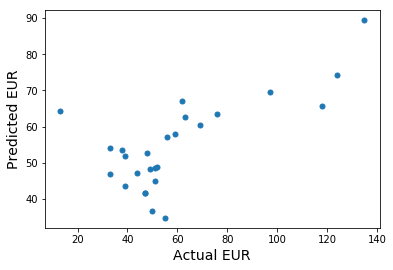

In [305]:
#Log y model
model2b_ol = sm.OLS(np.log(y), X2,missing='drop').fit()
predictions2b_ol = model2b_ol.predict(X2) # make the predictions by the model
print()

plt.plot(y,np.power(np.e,predictions2b_ol), linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual EUR/ft",fontsize=14)
plt.ylabel("Predicted EUR/ft",fontsize=14)
# Print out the statistics
#print(np.c_[y,predictions2b_ol])
model2b_ol.summary()

## 3 parameter linear (+ 1 quadratic)  regression
## ....negligible improvement ; use prior simpler models


In [297]:
#squared coefficients model
#X2["lbs-ft"]=result[]
X2c=X2.copy()
#Note without the [:] in the above assignment, X2 will be modified when using the new variable X2c
#lbsft2=np.zeros(len(X2))
X2c["lbs-ft2"]=np.power(X2c["lbs-ft"],2)#np.zeros(len(X2))
np.power(X2c["lbs-ft2"],2)   #=X2["lbs-ft"]^2
#display(X2c["lbs-ft2"])
display(X2)
#X2c["lbs-ft2"]=lbsft2
display(X2c)



,const,yloc,BV,lbs-ft
0,1.0,14736.0,NaN,389.0
1,1.0,14736.0,NaN,504.0
2,1.0,5641.0,51044.73,251.0
3,1.0,7876.0,51051.70,317.0
4,1.0,8032.0,53792.48,498.0
5,1.0,8032.0,26786.69,497.0
6,1.0,6965.0,110607.69,470.0
7,1.0,3878.0,NaN,465.0
8,1.0,19567.0,84953.69,392.0
9,1.0,29865.0,NaN,490.0


,const,yloc,BV,lbs-ft,lbs-ft2
0,1.0,14736.0,NaN,389.0,151321.0
1,1.0,14736.0,NaN,504.0,254016.0
2,1.0,5641.0,51044.73,251.0,63001.0
3,1.0,7876.0,51051.70,317.0,100489.0
4,1.0,8032.0,53792.48,498.0,248004.0
5,1.0,8032.0,26786.69,497.0,247009.0
6,1.0,6965.0,110607.69,470.0,220900.0
7,1.0,3878.0,NaN,465.0,216225.0
8,1.0,19567.0,84953.69,392.0,153664.0
9,1.0,29865.0,NaN,490.0,240100.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EUR-ft   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     4.224
Date:                Mon, 17 Jun 2019   Prob (F-statistic):             0.0116
Time:                        14:58:28   Log-Likelihood:                -116.28
No. Observations:                  26   AIC:                             242.6
Df Residuals:                      21   BIC:                             248.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.5477    139.636     -0.240      0.812    -323.936     256.841
yloc          -0.0018      0.001     -2.511      0.020      -0.003      -0.000
BV            -0.0002      0.000     -1.110      0.280      -0.000       0.000
lbs-ft         0.5714      0.716      0.799      0.433      -0.917       2.060
lbs-ft2       -0.0006      0.001     -0.694      0.495      -0.002       0.001
==============================================================================
Omnibus:                        8.811   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.193
Skew:                          -0.800   Prob(JB):                       0.0166
Kurtosis:                       5.236   Cond. No.                     7.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

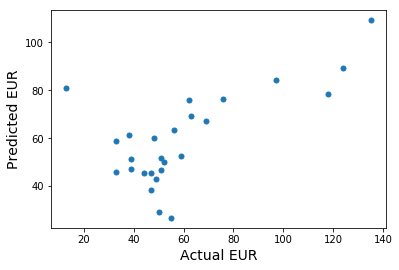

In [298]:
model2c_ol = sm.OLS(y, X2c,missing='drop').fit()
predictions2c_ol = model2c_ol.predict(X2c) # make the predictions by the model

plt.plot(y,predictions2c_ol, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual EUR/ft",fontsize=14)
plt.ylabel("Predicted EUR/ft",fontsize=14)
# Print out the statistics
#print(np.c_[y,predictions2_ol])
model2c_ol.summary()

## 2 parameter linear (+ 1 quadratic)  regression
## ....weakest correlation


note extra # of observations when removing the BV column that contained many nulls


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EUR-ft   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.262
Date:                Mon, 17 Jun 2019   Prob (F-statistic):              0.298
Time:                        19:07:41   Log-Likelihood:                -249.45
No. Observations:                  53   AIC:                             506.9
Df Residuals:                      49   BIC:                             514.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.6821     18.081      1.973      0.054      -0.653      72.017
yloc        7.373e-05      0.000      0.233      0.817      -0.001       0.001
lbs-ft         0.2293      0.123      1.865      0.068      -0.018       0.476
lbs-ft2       -0.0004      0.000     -1.940      0.058      -0.001     1.4e-05
==============================================================================
Omnibus:                        8.946   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.413
Skew:                           0.940   Prob(JB):                       0.0149
Kurtosis:                       3.524   Cond. No.                     9.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

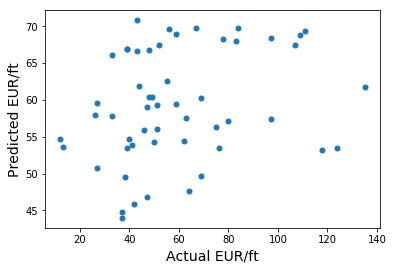

In [308]:
X3 = X2c.copy()
del(X3["BV"])
model3 = sm.OLS(y, X3,missing='drop').fit()
predictions3 = model3.predict(X3) # make the predictions by the model
plt.plot(y,predictions3, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual EUR/ft",fontsize=14)
plt.ylabel("Predicted EUR/ft",fontsize=14)
# Print out the statistics
print("note extra # of observations when removing the BV column that contained many nulls")
model3.summary()


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)